# Exploratory Data Analysis of used car Kaggle dataset 

### 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 2) Load Data

In [2]:
data = pd.DataFrame(pd.read_csv('car_web_scraped_dataset.csv'))

In [3]:
data.shape

(2840, 6)

In [4]:
data.nunique()

name          309
year           24
miles        2280
color          64
condition      25
price        1245
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   object
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
dtypes: int64(1), object(5)
memory usage: 133.3+ KB


In [6]:
data.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"


In [7]:
data.dtypes

name         object
year          int64
miles        object
color        object
condition    object
price        object
dtype: object

### 3) Define functions for data pre-processing

In [8]:
## Function to check unique values for each column

def unique_values(data,column):
    return data[column].unique()

In [9]:
unique_values(data,'year')

array([2022, 2021, 2020, 2019, 2018, 2013, 2016, 2014, 2017, 2015, 2012,
       2023, 2011, 2000, 2024, 2010, 2007, 2009, 2006, 2008, 2004, 2002,
       2005, 2003], dtype=int64)

In [10]:
## Function to remove certain characters

def replace_with_space(data,column,value):
    data[column] = data[column].str.replace(value,'')

In [11]:
## Function to replace characters with certain values

def replace_with_value(data,column,value,replaced_value):
    data[column] = data[column].replace(value,replaced_value)

In [12]:
## Function to change data type to integer for future analysis

def change_column_data_type_to_int(data,column):
    data[column] = data[column].astype('int64')

In [13]:
## Function to rename column

def rename_column(data,column,new_name):
    data[new_name] = data[column]

In [14]:
data.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"


In [15]:
## Pre-processing column 'miles' by removing unwanted characters and spaces and converting to integers

replace_with_space(data,'miles',' miles')
replace_with_space(data,'miles',',')

change_column_data_type_to_int(data,'miles')

In [16]:
## Pre-processing column 'price' by removing unwanted characters and spaces and converting to integers

replace_with_space(data,'price','$')
replace_with_space(data,'price',',')

change_column_data_type_to_int(data,'price')

C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_4408\224644587.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].str.replace(value,'')


In [17]:
## Renaming column 'price' to 'price in $' and dropping column 'price'

rename_column(data,'price','price in $')
data.drop('price',axis=1,inplace=True)

In [18]:
data.head()

,name,year,miles,color,condition,price in $
0,Kia Forte,2022,41406,"Gray exterior, Black interior","No accidents reported, 1 Owner",15988
1,Chevrolet Silverado 1500,2021,15138,"White exterior, Black interior","1 accident reported, 1 Owner",38008
2,Toyota RAV4,2022,32879,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988
3,Honda Civic,2020,37190,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998
4,Honda Civic,2020,27496,"Black exterior, Black interior","No accidents reported, 1 Owner",19498


In [19]:
## Splitting the 'color' column in two parts - exterior and interior color

data[['exterior color','interior color']] = data['color'].str.split(', ',expand=True)
data.drop('color',axis=1,inplace=True)

In [20]:
## Pre-processing column 'exterior and interior color' by removing unwanted characters and spaces

replace_with_space(data,'exterior color',' exterior')
replace_with_space(data,'interior color',' interior')

In [21]:
data.head()

,name,year,miles,condition,price in $,exterior color,interior color
0,Kia Forte,2022,41406,"No accidents reported, 1 Owner",15988,Gray,Black
1,Chevrolet Silverado 1500,2021,15138,"1 accident reported, 1 Owner",38008,White,Black
2,Toyota RAV4,2022,32879,"No accidents reported, 1 Owner",24988,Silver,Unknown
3,Honda Civic,2020,37190,"No accidents reported, 1 Owner",18998,Blue,Black
4,Honda Civic,2020,27496,"No accidents reported, 1 Owner",19498,Black,Black


In [22]:
## Splitting the 'condition' column in two parts - number of accidents and the number of owners 

data[['# accidents reported','# owners']] = data['condition'].str.split(', ',expand=True)
data.drop('condition',axis=1,inplace=True)

In [23]:
## Splitting the '# owners' column in two parts - number and the owner text 

data[['# owners','owner text']] = data['# owners'].str.split(' ',expand=True)
data.drop('owner text',axis=1,inplace=True)

In [24]:
## Splitting the '# accidents reported' column in three parts - number, accident text 1, accident text 2

data[['# accidents reported','accident text1','accident text2']] = data['# accidents reported'].str.split(' ',expand=True)
data.drop(['accident text1','accident text2'],axis=1,inplace=True)

In [25]:
## Replace 'No' with a 0 to contain integer values

replace_with_value(data,'# accidents reported','No',0)

In [26]:
## Changing data type to integers for future analysis

change_column_data_type_to_int(data,'# accidents reported')
change_column_data_type_to_int(data,'# owners')

In [27]:
data.head()

,name,year,miles,price in $,exterior color,interior color,# accidents reported,# owners
0,Kia Forte,2022,41406,15988,Gray,Black,0,1
1,Chevrolet Silverado 1500,2021,15138,38008,White,Black,1,1
2,Toyota RAV4,2022,32879,24988,Silver,Unknown,0,1
3,Honda Civic,2020,37190,18998,Blue,Black,0,1
4,Honda Civic,2020,27496,19498,Black,Black,0,1


Text(0.5, 1.0, '# Owners')

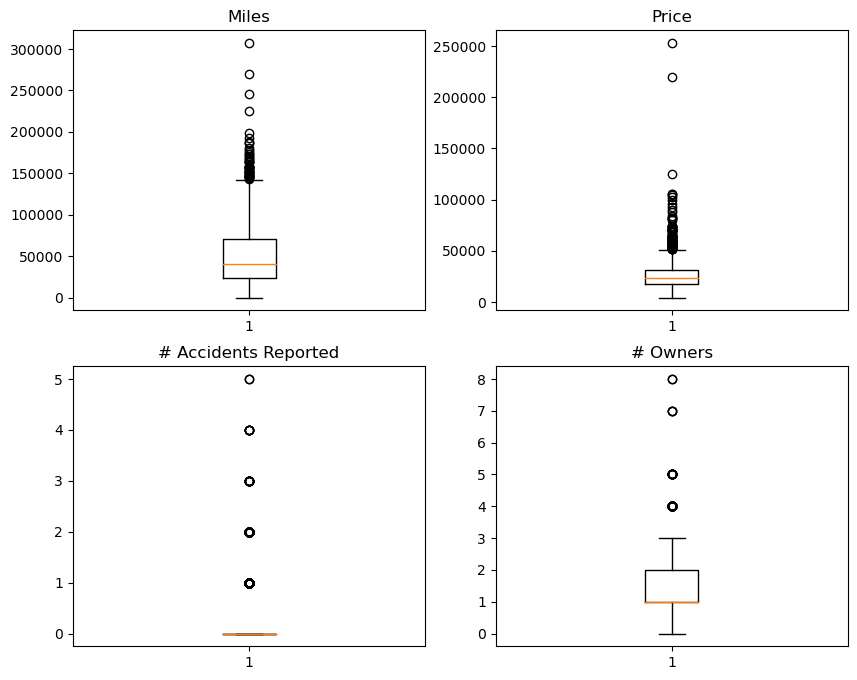

In [28]:
## Boxplot to visualize outliers (across different columns)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].boxplot(data['miles'])
axes[0, 0].set_title('Miles')

axes[0, 1].boxplot(data['price in $'])
axes[0, 1].set_title('Price')

axes[1, 0].boxplot(data['# accidents reported'])
axes[1, 0].set_title('# Accidents Reported')

axes[1, 1].boxplot(data['# owners'])
axes[1, 1].set_title('# Owners')

In [29]:
## Function to determine outliers

def detect_outliers_iqr(data,column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

In [30]:
## Variables to store outliers

miles_outliers = detect_outliers_iqr(data,'miles')
price_outliers = detect_outliers_iqr(data,'price in $')

In [31]:
## Dropping the outlier records

data.drop(miles_outliers.index,axis=0,inplace=True)
data.drop(price_outliers.index,axis=0,inplace=True)

In [32]:
data.shape

(2687, 8)

### 4) Exploratory Data Analysis

C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_4408\1642697293.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

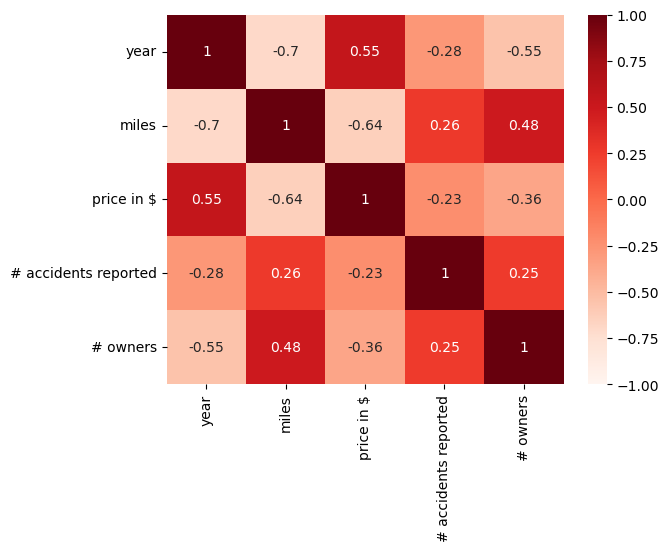

In [33]:
## Heatmap to check correlation between numerical entities

corr = data.corr()
sns.heatmap(corr,cmap='Reds',annot=True,vmin=-1,vmax=1)

### **A strong correlation is observed between the miles driven, price of the car, and the years**

In [34]:
data.describe()

,year,miles,price in $,# accidents reported,# owners
count,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000
mean,2018.884258,49271.626349,24375.160402,0.283588,1.494604
std,3.384902,32858.040846,9358.654554,0.597808,0.830288
min,2000.000000,25.000000,4395.000000,0.000000,0.000000
25%,2017.000000,24252.500000,17888.000000,0.000000,1.000000
50%,2020.000000,41484.000000,22998.000000,0.000000,1.000000
75%,2021.000000,70343.000000,30459.500000,0.000000,2.000000
max,2024.000000,142018.000000,51187.000000,5.000000,7.000000


In [35]:
## Data aggregated by year

columns_to_sum = ['miles', 'price in $', '# accidents reported', '# owners']
year_wise_data = pd.DataFrame(data.groupby('year')[columns_to_sum].sum().reset_index())

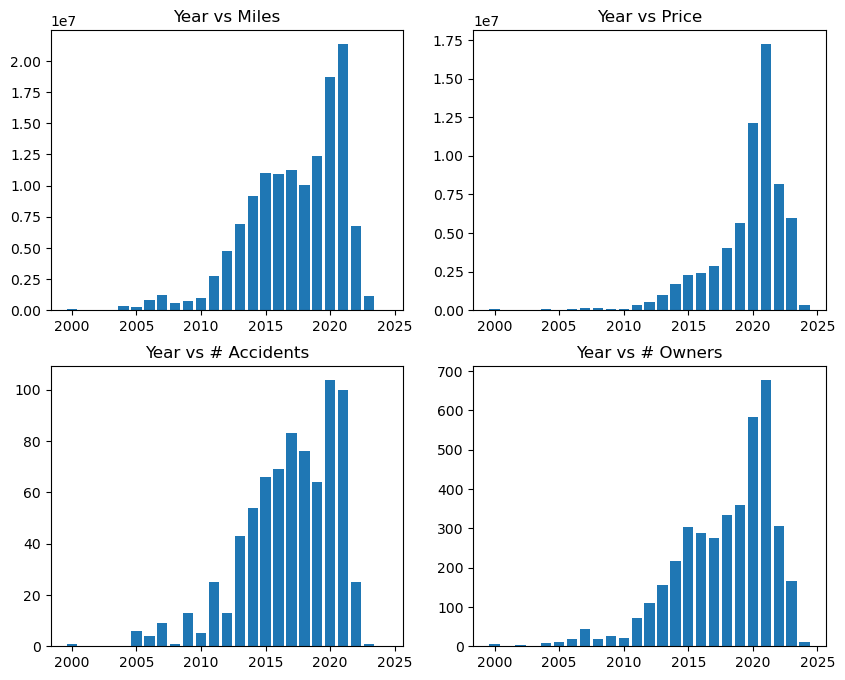

In [36]:
## Bar graphs for miles drive, price in $, # accidents, and # owners across years

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1 - Bar plot for 'year' vs 'miles'
axes[0, 0].bar(x=year_wise_data['year'], height=year_wise_data['miles'])
axes[0, 0].set_title('Year vs Miles')

# Plot 2 - Bar plot for 'year' vs 'price'
axes[0, 1].bar(x=year_wise_data['year'], height=year_wise_data['price in $'])
axes[0, 1].set_title('Year vs Price')

# Plot 3 - Bar plot for 'year' vs '# accidents reported'
axes[1, 0].bar(x=year_wise_data['year'], height=year_wise_data['# accidents reported'])
axes[1, 0].set_title('Year vs # Accidents')

# Plot 4 - Bar plot for 'year' vs '# owners'
axes[1, 1].bar(x=year_wise_data['year'], height=year_wise_data['# owners'])
axes[1, 1].set_title('Year vs # Owners')

plt.show()

### Post 2011, there has been an increase in the purchase of used cars as well as the number of accidents reported

Text(0.5, 1.0, 'Interior Color Distribution')

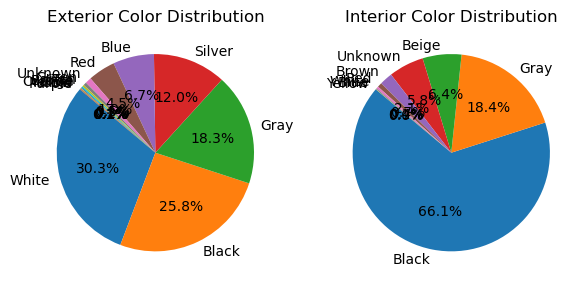

In [37]:
## Pie chart to show distribution of cars based on interior and exterior colors

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

# Plot 1 - Pie chart for exterior car color distribution
color_counts_ext = data['exterior color'].value_counts()
axes[0].pie(color_counts_ext, labels=color_counts_ext.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Exterior Color Distribution')

# Plot 2 - Pie chart for interior car color distribution
color_counts_int = data['interior color'].value_counts()
axes[1].pie(color_counts_int, labels=color_counts_int.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Interior Color Distribution')

### There is a high tendency among customers to buy monochromatic colored cars (such as black, gray, silver, and white)

In [38]:
## Data aggregated by exterior color

columns_to_sum = ['miles', 'price in $', '# accidents reported', '# owners']
exterior_color_wise_data = pd.DataFrame(data.groupby('exterior color')[columns_to_sum].sum().reset_index())

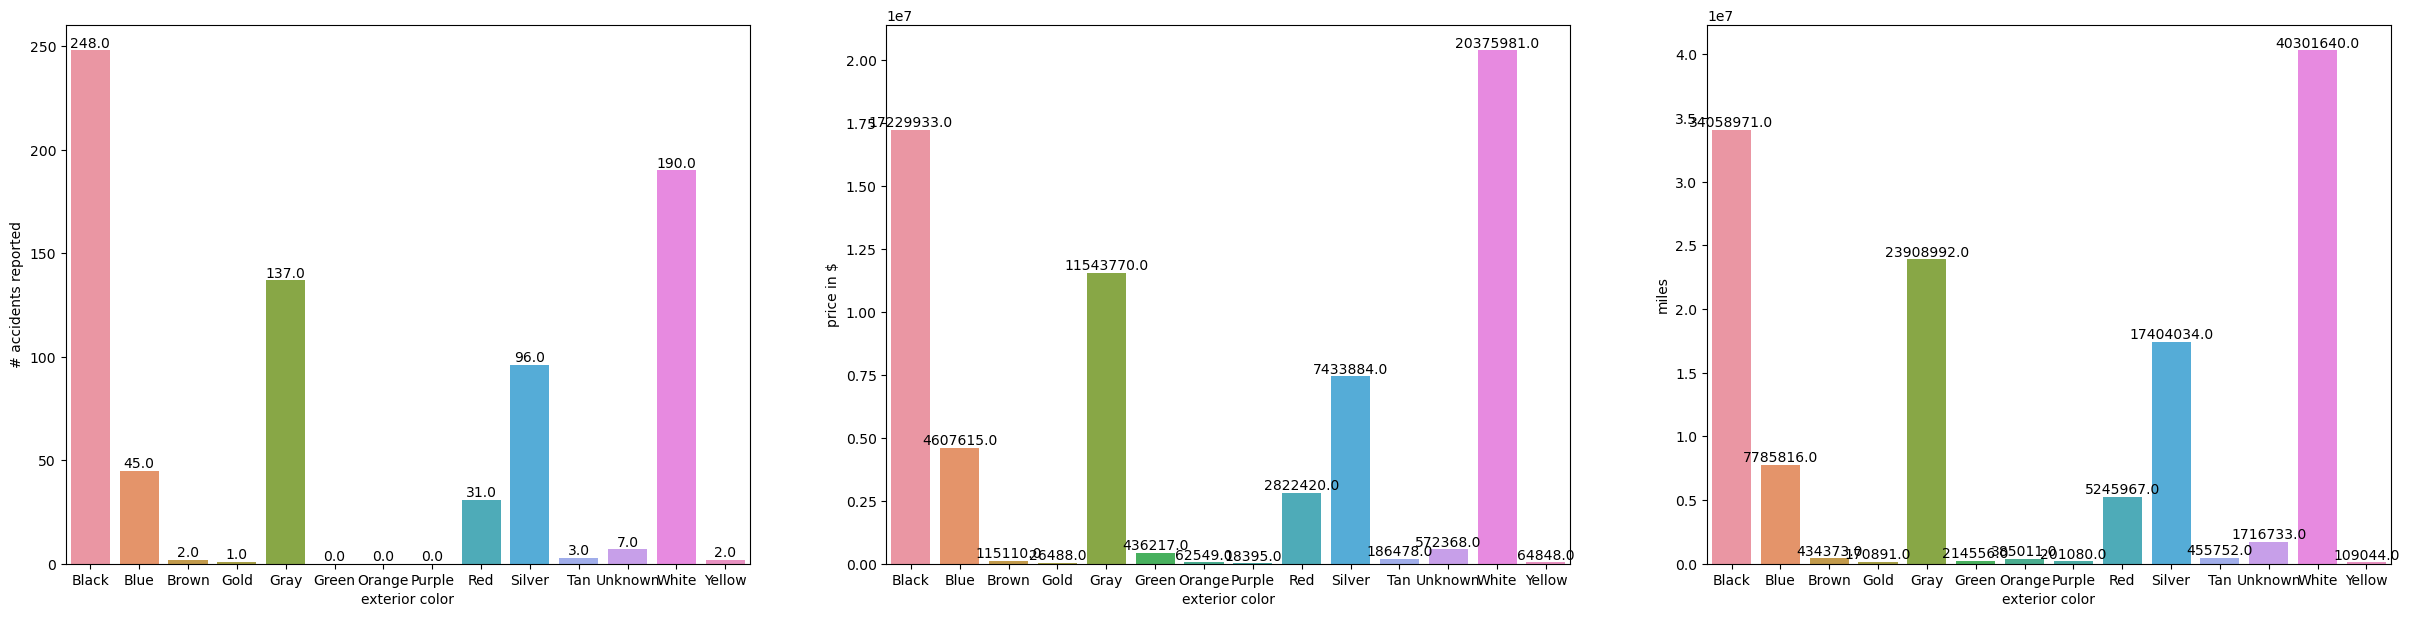

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 7))

# Bar chart for # accidents reported based on exterior car color

plt.rcParams['figure.figsize'] = [25,7]
ax = sns.barplot(exterior_color_wise_data,x=exterior_color_wise_data['exterior color'],y=exterior_color_wise_data['# accidents reported'], ax=axes[0])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

# Bar chart for price of car based on exterior car color

plt.rcParams['figure.figsize'] = [25,7]
ax = sns.barplot(exterior_color_wise_data,x=exterior_color_wise_data['exterior color'],y=exterior_color_wise_data['price in $'], ax=axes[1])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center', va='bottom')
    
# Bar chart for # miles drove based on exterior car color

plt.rcParams['figure.figsize'] = [25,7]
ax = sns.barplot(exterior_color_wise_data,x=exterior_color_wise_data['exterior color'],y=exterior_color_wise_data['miles'], ax=axes[2])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

In [40]:
## Data aggregated by interior color

columns_to_sum = ['miles', 'price in $', '# accidents reported', '# owners']
interior_color_wise_data = pd.DataFrame(data.groupby('interior color')[columns_to_sum].sum().reset_index())

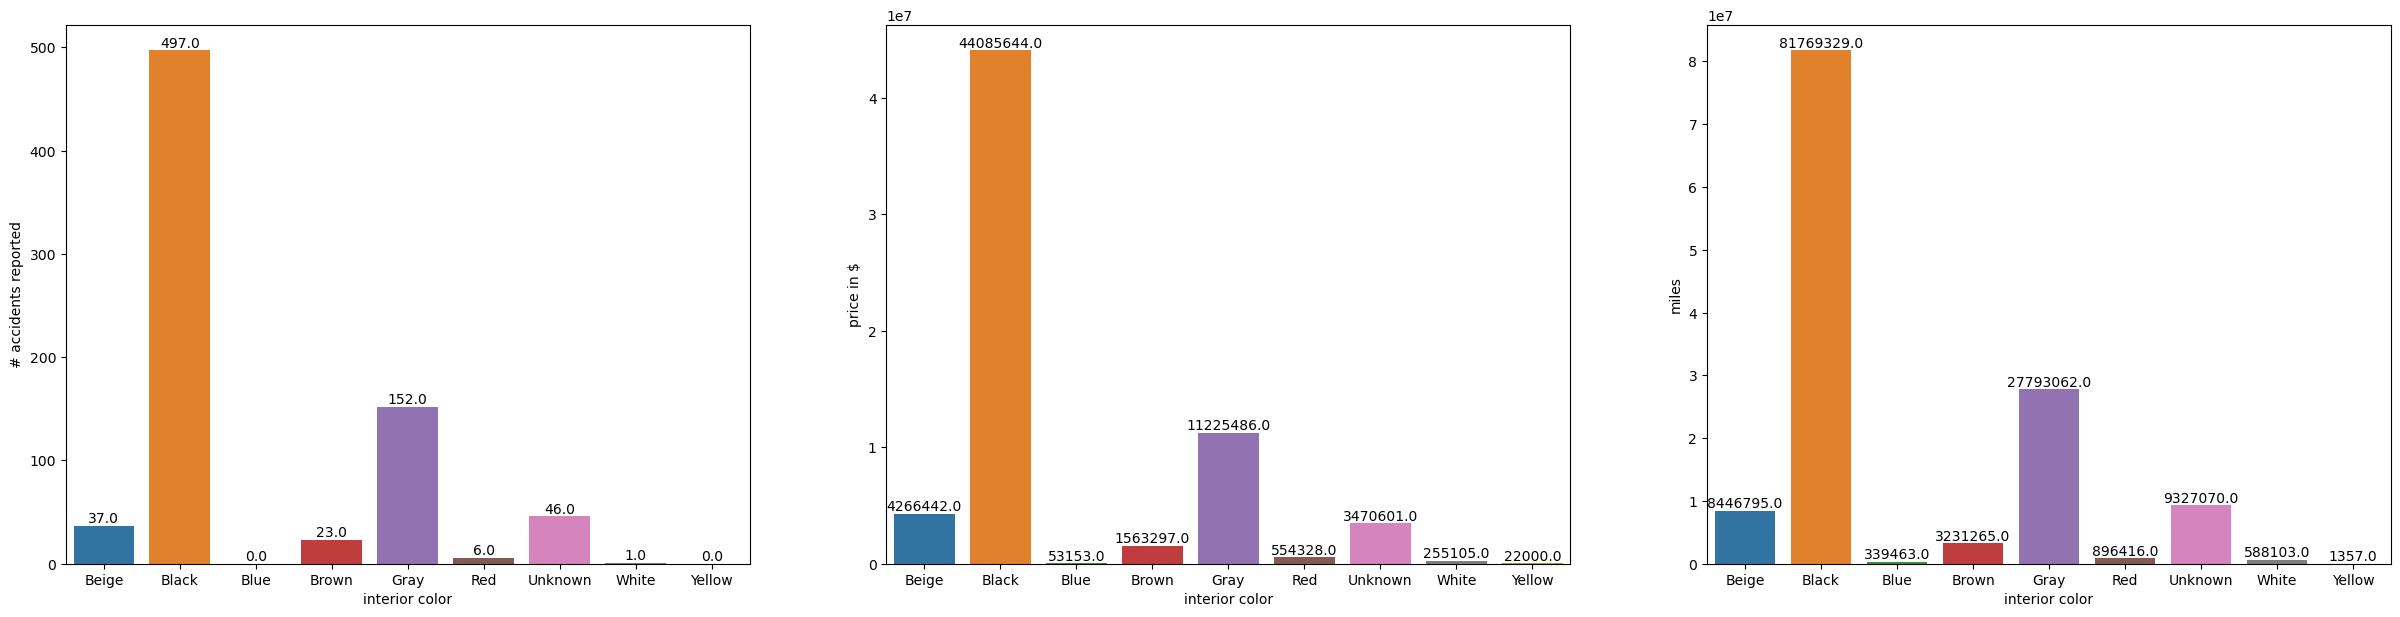

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 7))

# Bar chart for # accidents reported based on interior car color

plt.rcParams['figure.figsize'] = [25,7]
ax = sns.barplot(interior_color_wise_data,x=interior_color_wise_data['interior color'],y=interior_color_wise_data['# accidents reported'], ax=axes[0])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

# Bar chart for price of car based on exterior car color

plt.rcParams['figure.figsize'] = [25,7]
ax = sns.barplot(interior_color_wise_data,x=interior_color_wise_data['interior color'],y=interior_color_wise_data['price in $'], ax=axes[1])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center', va='bottom')
    
# Bar chart for # miles drove based on exterior car color

plt.rcParams['figure.figsize'] = [25,7]
ax = sns.barplot(interior_color_wise_data,x=interior_color_wise_data['interior color'],y=interior_color_wise_data['miles'], ax=axes[2])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

In [42]:
## Data aggregated by car type

columns_to_sum = ['miles', 'price in $', '# accidents reported', '# owners']
cartype_wise_data = pd.DataFrame(data.groupby('name')[columns_to_sum].sum().reset_index())

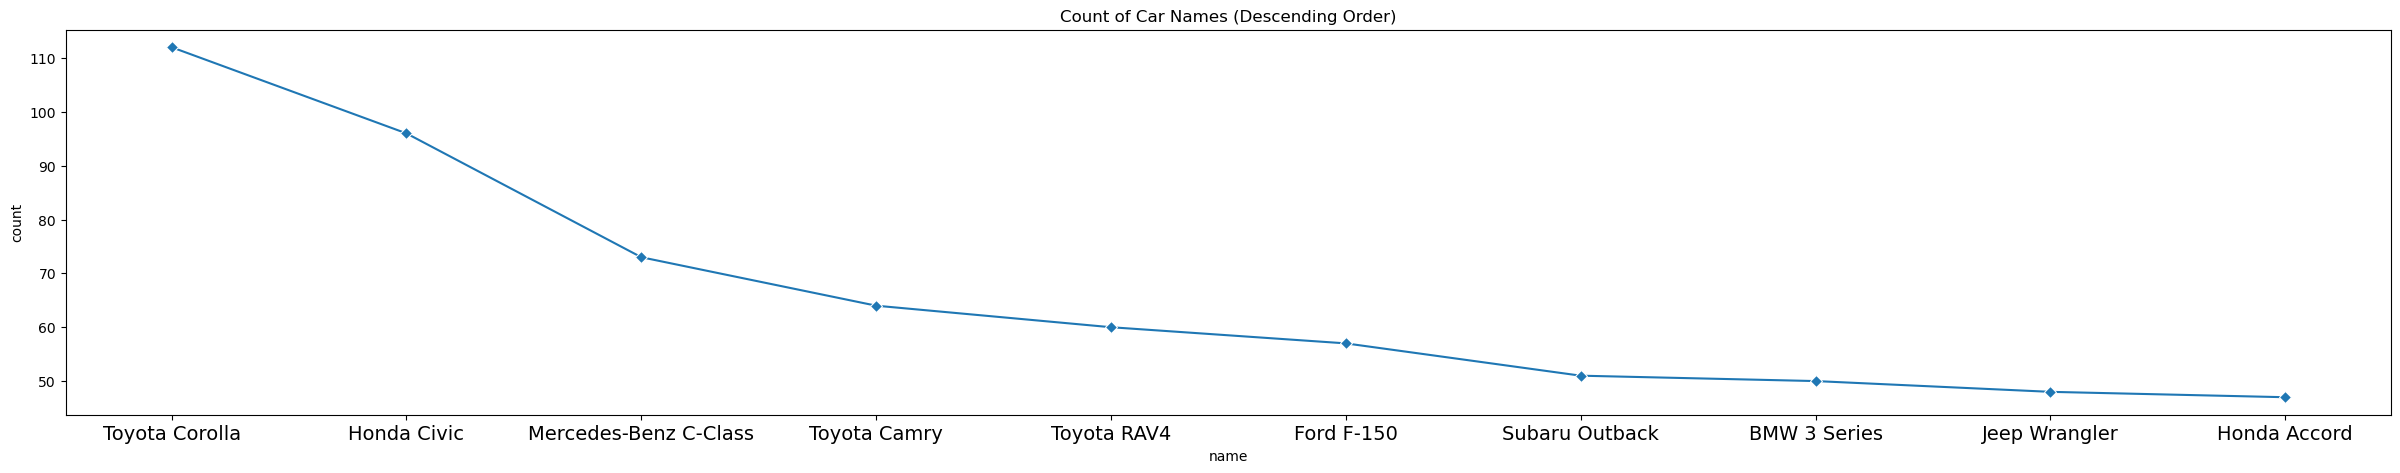

In [43]:
car_type_count = pd.crosstab(index = data['name'], columns='count')

car_type_count_sorted = car_type_count.sort_values(by='count', ascending=False)
car_type_count_top_10 = car_type_count_sorted.head(10)

# Create a heatmap
plt.figure(figsize=(30, 5))
sns.lineplot(data=car_type_count_top_10,x=car_type_count_top_10.index,y='count',marker='D')
#sns.heatmap(car_type_count_top_10[['count']], annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})

plt.xticks(fontsize=14)
plt.title('Count of Car Names (Descending Order)')
plt.show()

In [44]:
top_10_data = data[(data['name'] == 'Toyota Corolia') | (data['name'] == 'Honda Civic') | (data['name'] == 'Mercedes-Benx C-Class') | (data['name'] == 'Toyota Camry') | (data['name'] == 'Toyota RAV4') | (data['name'] == 'Ford F-150') | (data['name'] == 'Subaru Outback') | (data['name'] == 'BMW 3 Series') | (data['name'] == 'Jeep Wrangler') | (data['name'] == 'Honda Accord')]

In [45]:
## Data aggregated by exterior color

columns_to_sum = ['miles', 'price in $', '# accidents reported', '# owners']
car_wise_data = pd.DataFrame(data.groupby('name')[columns_to_sum].sum().reset_index())

In [46]:
car_wise_data_sorted_accidents = car_wise_data.sort_values(by = '# accidents reported', ascending = False)
car_wise_data_top10_accidents = car_wise_data_sorted_accidents.head(10)

<Axes: xlabel='name', ylabel='# accidents reported'>

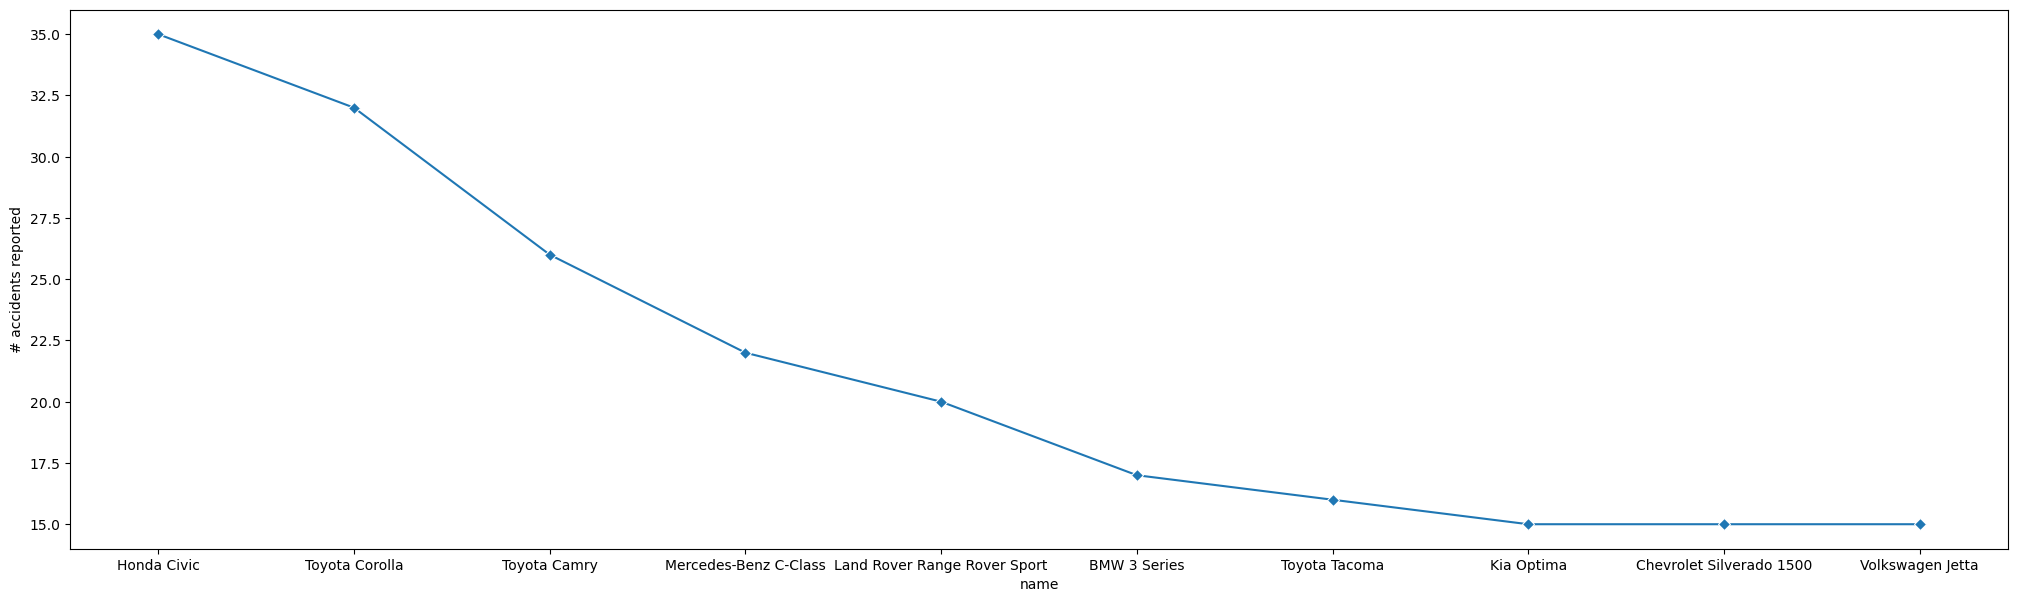

In [47]:
sns.lineplot(data=car_wise_data_top10_accidents, x='name', y= '# accidents reported',marker='D')

## Mini Report

Through detailed exploratory data analysis (EDA), we've uncovered a significant uptick in used car acquisitions post-2011, evident in bar charts illustrating key factors such as price, mileage, accidents, and ownership. While the surge in buying used cars may be linked to a rise in accidents, it's crucial to delve into the contributing characteristics. Consumer preferences become apparent, with a strong inclination towards black, white, gray, and silver exteriors, complemented by black and gray interiors. Examining car types, the top 5 selling cars include Toyota Corolla, Honda Civic, Mercedes Benz, Toyota Camry, and Toyota RAV4, whereas the top 5 cars with the highest accident rates comprise Honda Civic, Toyota Corolla, Toyota Camry, Mercedes Benz, and Land Rover Range. This dual analysis provides valuable insights into consumer preferences regarding car types and colors, simultaneously offering a closer look at the factors contributing to accidents in the used car market.